# Tanmay Garg
## CS20BTECH11063
### Data Science Analysis Assignment 8

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy import optimize
import astroML
from astroML.stats import sigmaG
import pandas as pd
import seaborn as sns
np.random.seed(0)
import emcee
import corner
from sklearn.neighbors import KernelDensity
from IPython.display import display, Math
import dynesty
# import nestle
from astroML.correlation import bootstrap_two_point_angular

# Q1

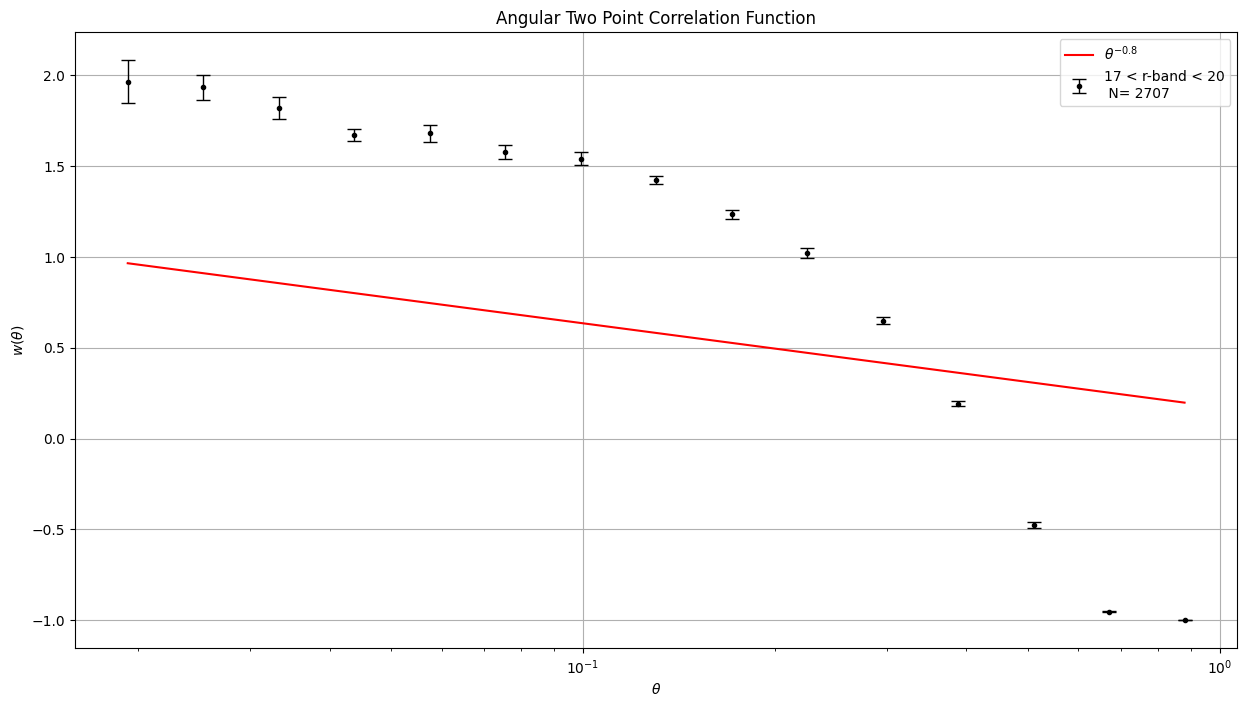

In [50]:
df = pd.read_csv('BCS05hr_reduced.txt', sep=' ')

# filter by r-mag between 17 and 20 and spread_model > 0.002
df = df[(df['r-mag'] > 17) & (df['r-mag'] < 20) & (df['spread_model'] > 0.002)]

def angular_two_point_corr_function(data, Nbins=16, Nbootstraps=10, upper_angular=1.0, 
                                    lower_angular=1/60.0, num_bin_angular=16):
    bins = 10 ** np.linspace(np.log10(lower_angular), np.log10(upper_angular), num_bin_angular)
    # print(np.linspace(np.log10(lower_angular), np.log10(upper_angular), num_bin_angular).shape)
    
    results = [bins]
    for sub_data in [data]:
        results += bootstrap_two_point_angular(sub_data['RA'], sub_data['DEC'], bins=bins, Nbootstraps=Nbootstraps)
    return results

results = angular_two_point_corr_function(df)
bins = results[0]
corr = results[1]
corr_err = results[2]
nbootstraps = results[3]

bin_centers = 0.5 * (bins[1:] + bins[:-1])
power_law = -0.8
# Plotting the results
plt.figure(figsize=(15, 8))
x = np.array([np.min(bin_centers), np.max(bin_centers)])
plt.xscale('log')
plt.yscale('linear')
plt.errorbar(bin_centers, corr, yerr=corr_err, fmt='.k', capsize=5, lw=1, label='17 < r-band < 20\n N= %d' % len(df))
plt.plot(x, (10**x)**(power_law), 'r', label=r'$\theta^{-0.8}$')
plt.xlabel(r'$\theta$')
plt.ylabel(r'$w(\theta)$')
plt.title('Angular Two Point Correlation Function')
plt.legend()
plt.grid()
plt.show()
plt.close()

# print(bin_centers, corr, corr_err)

Assumption taken is Two point correlation function follows the power law and is proportional to $\theta^{-0.8}$

Reference:

https://www.astroml.org/book_figures/chapter6/fig_correlation_function.html